# This notebook will contain answers to the EDA Individual Assignment.
### (for CSE 445, Section 7)
#### **Adib Ar Rahman Khan, 2212708042**

## **TASK 1:**

#### Question 1: Which of the following statements best describes a dataset?

**B)** A group of data visualization techniques. 

#### Question 2: Why is data preprocessing an important step in data analysis?

**C)** It reduces noise and inconsistencies in the data, improving the quality of analysis.  

#### Question 3: Which of the following is considered categorical data?

**C)** Colors of flowers (e.g., red, blue, yellow).   

#### Question 4: What is one common method for handling missing data in a dataset?

**B)** Removing the entire row or column containing missing values.  


#### Question 5: What does feature engineering involve in data analysis?

**C)** It involves creating or transforming new features to improve the model's performance.  

#### Question 6: Why is splitting a dataset into training and testing sets important?

**C)** To ensure that the model's performance is evaluated on unseen data.  


#### Question 7: What is a common technique to handle categorical data before feeding it into a machine learning model?
 
**C)** One-Hot Encoding, where each category becomes a binary column.  

#### Question 8: Why might scaling numerical features in a dataset be necessary?

**C)** To ensure that all numerical features have the same unit of measurement.  

#### Question 9: What is an outlier in the context of data analysis?
 
**C)** Unusual or extreme data points that significantly differ from the rest.  

#### Question 10: What does data imputation involve?
 
**D)** Filling in missing values with estimated or calculated values.  

#### Question 11: What is a consideration when dealing with time-series data in data analysis?

**C)** The order and timing of data points matter.  

#### Question 12: What is the primary goal of dimensionality reduction techniques in data analysis?

**D)** To reduce the number of features while preserving relevant information.  

#### Question 13: Why is addressing imbalanced classes important when building models?

**C)** Imbalanced classes can bias the model towards the majority class.  

#### Question 14: Which preprocessing step is commonly used for text data before analysis?

**A)** Converting text data to numerical values using encoding techniques.  


## **TASK 2:**

### **Part 1: Data Analysis and Preprocessing**

#### First, we'll import the necessary libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# matplotlib used as it allows for greater control than seaborn, and it is what I am more familiar with.

#### 1: Let's **import the data** into a **dataframe**.

In [2]:
df = pd.read_csv('ecommerce_data.csv')

#### Getting **initial dataset information**:

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CustomerID  1000 non-null   int64  
 1   Timestamp   1000 non-null   object 
 2   ProductID   1000 non-null   int64  
 3   Category    900 non-null    object 
 4   Price       900 non-null    float64
 5   Quantity    1000 non-null   int64  
 6   Action      1000 non-null   object 
dtypes: float64(1), int64(3), object(3)
memory usage: 54.8+ KB


In [4]:
df.head(10) # printing the first 10 rows

,CustomerID,Timestamp,ProductID,Category,Price,Quantity,Action
0,1052,2023-01-01,2,Clothing,125.570224,2,Add to Cart
1,1093,2023-01-02,15,Clothing,191.996781,3,Add to Cart
2,1015,2023-01-03,8,Clothing,40.645691,1,Add to Cart
3,1072,2023-01-04,8,NaN,NaN,2,View
4,1061,2023-01-05,17,NaN,NaN,5,Purchase
5,1021,2023-01-06,12,Books,369.471757,1,Add to Cart
6,1083,2023-01-07,19,Home,156.727320,1,View
7,1087,2023-01-08,10,Books,95.005236,2,Add to Cart
8,1075,2023-01-09,9,Electronics,322.401100,3,Purchase
9,1075,2023-01-10,5,Books,253.121528,1,View


In [5]:
df.isna().sum() # finding null values

CustomerID      0
Timestamp       0
ProductID       0
Category      100
Price         100
Quantity        0
Action          0
dtype: int64

#### For the **null value features**, it will be **useful** to get **further information**:

In [6]:
df['Price'].nunique() # checking is all prices are unique, to verify no duplication

900

In [7]:
df['Category'].unique() # seeing all the unique categories

array(['Clothing', nan, 'Books', 'Home', 'Electronics'], dtype=object)

In [8]:
df['ProductID'].unique() # To see if there is any correlation between product id and the number of categories.

array([ 2, 15,  8, 17, 12, 19, 10,  9,  5,  6, 20, 13,  1, 16,  4, 11,  3,
       14, 18,  7])

#### **2: Handling missing values:**

#### Since our dataset is **quite small**, it will be **costly to drop** the instances with **null values**. Thus, we will **fill** them in using specific imputation methods.

#### For **Category**, we will use its **mode**, as it is the **most frequently occuring value** in this feature:

In [9]:
df['Category'].mode()[0]

'Clothing'

In [10]:
df.fillna({'Category': df['Category'].mode()[0]}, inplace=True) # Using in place, there is no need to reassign it back into the dataframe.
df

,CustomerID,Timestamp,ProductID,Category,Price,Quantity,Action
0,1052,2023-01-01,2,Clothing,125.570224,2,Add to Cart
1,1093,2023-01-02,15,Clothing,191.996781,3,Add to Cart
2,1015,2023-01-03,8,Clothing,40.645691,1,Add to Cart
3,1072,2023-01-04,8,Clothing,NaN,2,View
4,1061,2023-01-05,17,Clothing,NaN,5,Purchase
...,...,...,...,...,...,...,...
995,1010,2025-09-22,15,Books,284.444932,2,Add to Cart
996,1067,2025-09-23,2,Clothing,392.558608,5,Add to Cart
997,1018,2025-09-24,1,Home,357.159952,1,Add to Cart
998,1100,2025-09-25,11,Electronics,94.323722,3,Purchase


#### For **Price**, we will **replace** the **missing numerical** values with the **mean** of this feature:

In [11]:
df['Price'].mean()


np.float64(257.7055793204124)

In [12]:
df.fillna({'Price': df['Price'].mean()}, inplace=True) # inplace makes sure we don't have to reassign it to the dataframe again.
df

,CustomerID,Timestamp,ProductID,Category,Price,Quantity,Action
0,1052,2023-01-01,2,Clothing,125.570224,2,Add to Cart
1,1093,2023-01-02,15,Clothing,191.996781,3,Add to Cart
2,1015,2023-01-03,8,Clothing,40.645691,1,Add to Cart
3,1072,2023-01-04,8,Clothing,257.705579,2,View
4,1061,2023-01-05,17,Clothing,257.705579,5,Purchase
...,...,...,...,...,...,...,...
995,1010,2025-09-22,15,Books,284.444932,2,Add to Cart
996,1067,2025-09-23,2,Clothing,392.558608,5,Add to Cart
997,1018,2025-09-24,1,Home,357.159952,1,Add to Cart
998,1100,2025-09-25,11,Electronics,94.323722,3,Purchase


#### Finally, we **do not know** what this dataset will be used for, so it will be **unwise** to **round off** the **Price to 2 decimal points** (although that would have looked neater). If we are dealing with things like **precise demand forecasting**, or **fraud detection**, these **tiny variations** may make a **difference**.

### **3: Analyzing customer interactions**

#### It will be useful to first find out **how many unique customers** there are.

In [13]:
df['CustomerID'].unique()

array([1052, 1093, 1015, 1072, 1061, 1021, 1083, 1087, 1075, 1088, 1100,
       1024, 1003, 1022, 1053, 1002, 1030, 1038, 1064, 1060, 1033, 1076,
       1058, 1089, 1049, 1091, 1059, 1042, 1092, 1080, 1062, 1047, 1051,
       1055, 1007, 1073, 1039, 1018, 1004, 1014, 1009, 1090, 1084, 1071,
       1044, 1008, 1035, 1078, 1081, 1036, 1050, 1006, 1054, 1063, 1034,
       1074, 1095, 1048, 1040, 1085, 1082, 1026, 1041, 1029, 1045, 1065,
       1001, 1011, 1005, 1028, 1012, 1023, 1037, 1099, 1086, 1027, 1079,
       1077, 1096, 1094, 1043, 1013, 1032, 1066, 1057, 1097, 1070, 1056,
       1019, 1068, 1017, 1069, 1098, 1016, 1020, 1067, 1031, 1025, 1046,
       1010])

#### As it has **not** been specified if this will be used for a time-series analysis, we will be **sorting** the dataframe **in order** of the **CustomerID** to help us undersand it better (it can easily be changed later).

In [14]:
df.sort_values(by='CustomerID', inplace=True)
df = df.reset_index(drop=True)
df

,CustomerID,Timestamp,ProductID,Category,Price,Quantity,Action
0,1001,2024-05-06,18,Books,270.806190,5,Add to Cart
1,1001,2023-10-02,4,Clothing,32.600547,2,Add to Cart
2,1001,2024-12-06,11,Clothing,101.151270,2,View
3,1001,2025-04-07,16,Clothing,284.828487,1,Purchase
4,1001,2025-08-11,20,Clothing,257.705579,2,Purchase
...,...,...,...,...,...,...,...
995,1100,2024-06-05,14,Home,74.862466,3,View
996,1100,2024-06-11,1,Clothing,375.471419,3,Add to Cart
997,1100,2023-03-27,17,Clothing,257.705579,3,View
998,1100,2024-09-11,1,Books,153.332395,5,Add to Cart


#### **Finding the total number of Actions in the entire dataset:**

In [15]:
df['Action'].value_counts()

Action
Purchase       466
Add to Cart    271
View           263
Name: count, dtype: int64

#### **Finding total Actions for each Customer:**

In [16]:
df.groupby('CustomerID')['Action'].size()

CustomerID
1001    16
1002    13
1003    12
1004    11
1005    11
        ..
1096    13
1097     9
1098     7
1099    18
1100     9
Name: Action, Length: 100, dtype: int64

#### **To better understand this, we will visualize it via a simple Distribution:**

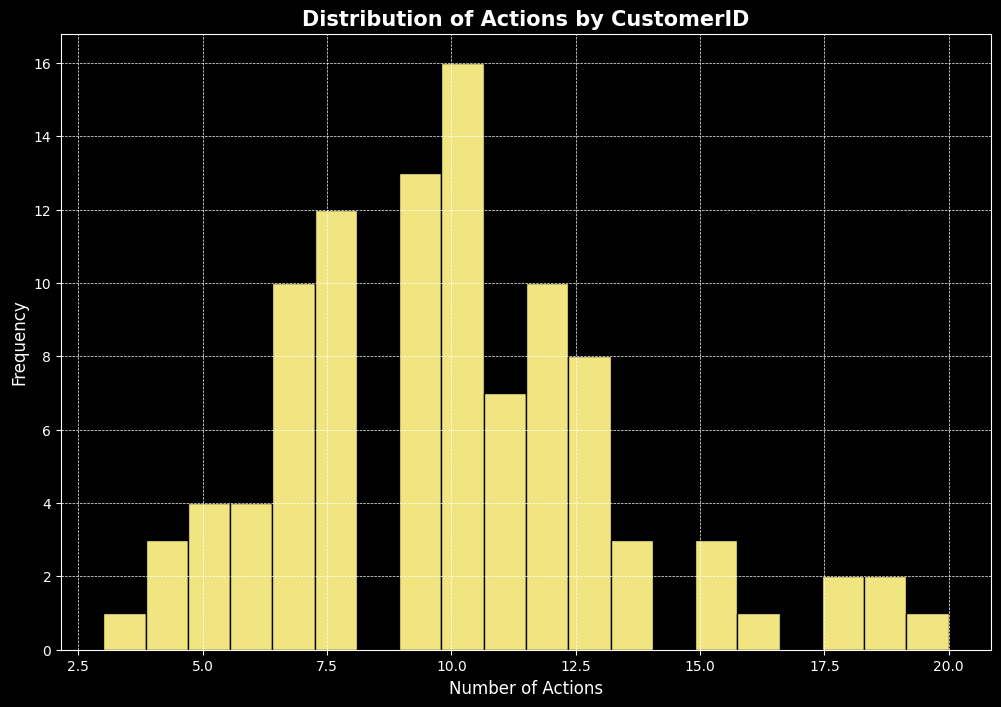

In [17]:
#setting the theme of the generated graphs
plt.style.use('dark_background')

# saving the actions per customer in a dataframe to be used
actions_by_customer = df.groupby('CustomerID')['Action'].count()

# plotting the histogram
plt.figure(figsize=(12, 8))
plt.title('Distribution of Actions by CustomerID', fontsize=15, fontdict={'fontweight': 'bold'})

plt.hist(actions_by_customer, bins=20, edgecolor='black', alpha=0.95, color='#fff38a')

plt.xlabel('Number of Actions', fontsize=12)
plt.xticks(fontsize=10)

plt.ylabel('Frequency', fontsize=12)
plt.yticks(fontsize=10)

plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.savefig('./generated/A1a.png', dpi=500)
plt.show()

### *Analysis: We can see a **normal distribution** as expected, with **most customers** having average engagement of around **10 interactions**, with a **few** having a **lot** of engagement.*

### **Part 2: Feature Engineering and Anaylsis:**

#### **1: Creating a new feature, 'TotalSpent', from 'Price' and 'Quantity':**

In [18]:
df['TotalSpent'] = df['Price'] * df['Quantity']
df

,CustomerID,Timestamp,ProductID,Category,Price,Quantity,Action,TotalSpent
0,1001,2024-05-06,18,Books,270.806190,5,Add to Cart,1354.030951
1,1001,2023-10-02,4,Clothing,32.600547,2,Add to Cart,65.201093
2,1001,2024-12-06,11,Clothing,101.151270,2,View,202.302540
3,1001,2025-04-07,16,Clothing,284.828487,1,Purchase,284.828487
4,1001,2025-08-11,20,Clothing,257.705579,2,Purchase,515.411159
...,...,...,...,...,...,...,...,...
995,1100,2024-06-05,14,Home,74.862466,3,View,224.587397
996,1100,2024-06-11,1,Clothing,375.471419,3,Add to Cart,1126.414257
997,1100,2023-03-27,17,Clothing,257.705579,3,View,773.116738
998,1100,2024-09-11,1,Books,153.332395,5,Add to Cart,766.661973


#### **Now, we find out the total amount spent per customer.**

In [19]:
total_spent_per_customer = df.groupby('CustomerID')['TotalSpent'].sum()
total_spent_per_customer

CustomerID
1001     6853.977804
1002    10987.303028
1003     9769.839998
1004     7977.577175
1005     7451.954286
            ...     
1096    11309.154776
1097     5415.631786
1098     6619.847574
1099    15608.907612
1100     5581.535609
Name: TotalSpent, Length: 100, dtype: float64

#### **Visualizing individual customer expenditure:**

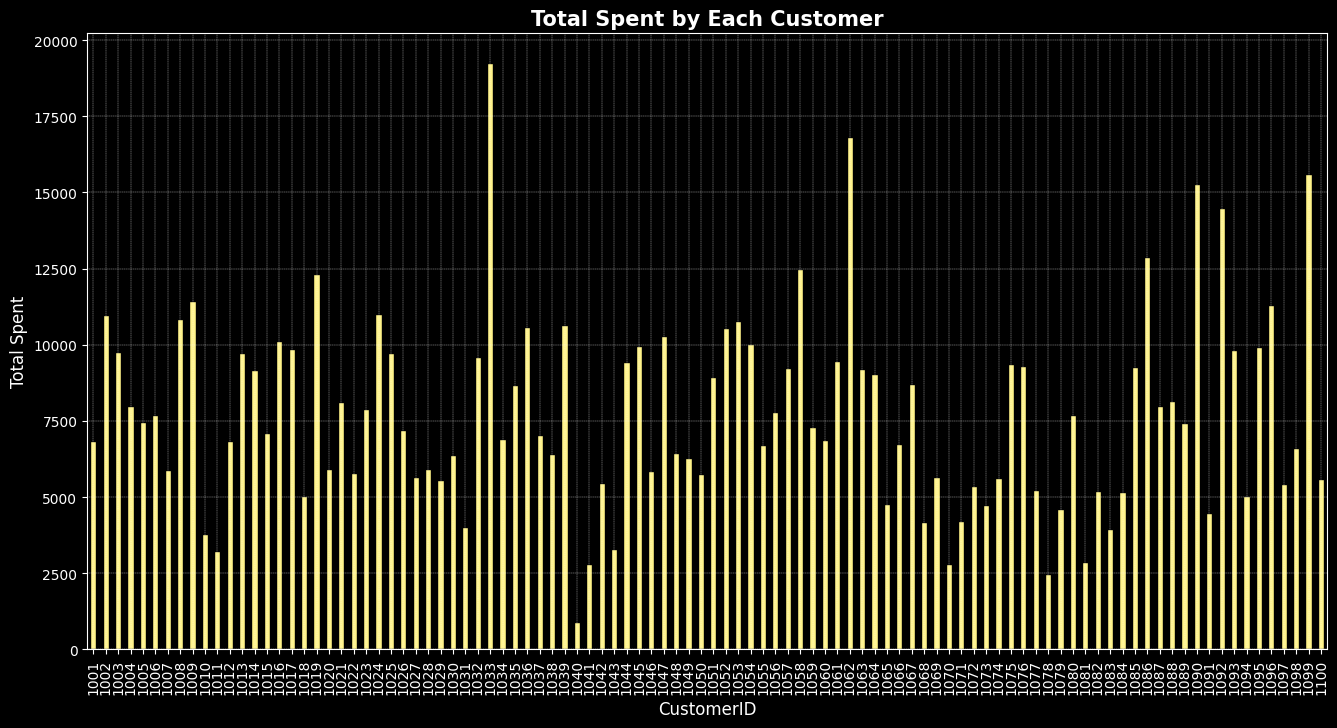

In [20]:
plt.figure(figsize=(16, 8))
plt.title('Total Spent by Each Customer', fontsize=15, fontdict={'fontweight': 'bold'})

total_spent_per_customer.plot(kind='bar', color='#fff38a', edgecolor='black')

plt.xlabel('CustomerID', fontsize=12)
plt.xticks(rotation=90, fontsize=10)

plt.ylabel('Total Spent', fontsize=12)
plt.yticks(fontsize=10)

plt.grid(True, which='both', linestyle='--', linewidth=0.25)

plt.savefig('./generated/A1b.png', dpi=500)
plt.show()

#### *Analysis: This **individual expenditure** helps us identify that **overall**, most customers spend an average of **5000~10000**, with **a few** spending **very high** amounts, over or around **13000**.*

#### Visualizing overall customer Expenditure:

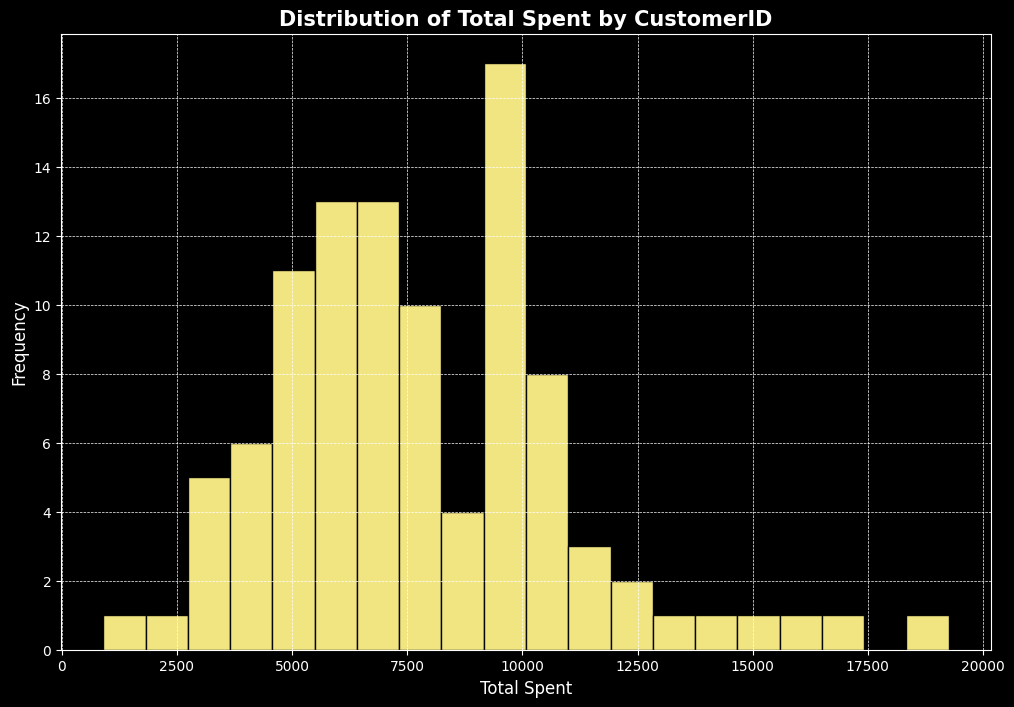

In [21]:
plt.figure(figsize=(12, 8))
plt.title('Distribution of Total Spent by CustomerID', fontsize=15, fontdict={'fontweight': 'bold'})

plt.hist(total_spent_per_customer, bins=20, edgecolor='black', alpha=0.95, color='#fff38a')

plt.xlabel('Total Spent', fontsize=12)
plt.xticks(fontsize=10)

plt.ylabel('Frequency', fontsize=12)
plt.yticks(fontsize=10)

plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.savefig('./generated/A1c.png', dpi=500)
plt.show()

### *Analysis: While the individual expenditure helped us identify how many outliers there were in spacific, here, we can see that a **big chunk** of customers spend around **6000~7000**, and **most** of them around **10000**. We also have a **few** spending **extreme amounts**, over **13000**.*

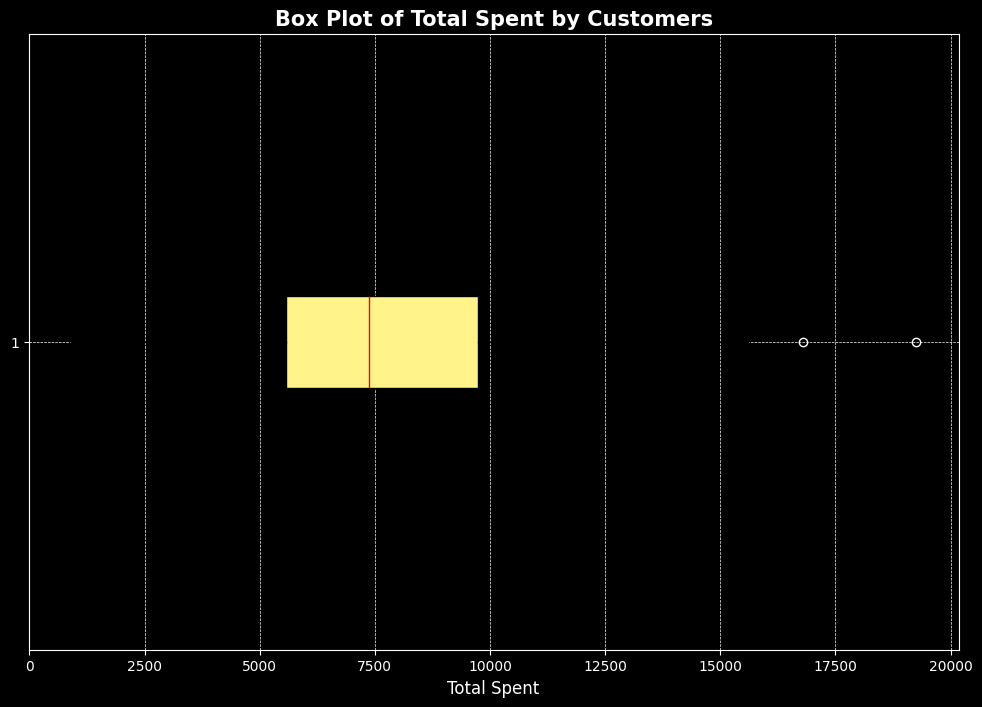

In [22]:
plt.figure(figsize=(12, 8))
plt.title('Box Plot of Total Spent by Customers', fontsize=15, fontdict={'fontweight': 'bold'})

plt.boxplot(total_spent_per_customer, vert=False, patch_artist=True, 
            boxprops=dict(facecolor='#fff38a', color='black'),
            whiskerprops=dict(color='black'),
            capprops=dict(color='black'),
            medianprops=dict(color='red'))

plt.xlabel('Total Spent', fontsize=12)
plt.xticks(fontsize=10)

plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.savefig('./generated/A1d.png', dpi=500)
plt.show()

#### *Analysis: Using a **Box-and-Whiskers Plot**, we can more easily see and understand the **median amount spent (about 7400)**, with the **lower quartile (about 5500)**, **upper quartile (about 9700**). This helps us to also identify **more outliers, (above 15500)***

#### **2: Grouping the data by Category and visualizing:**

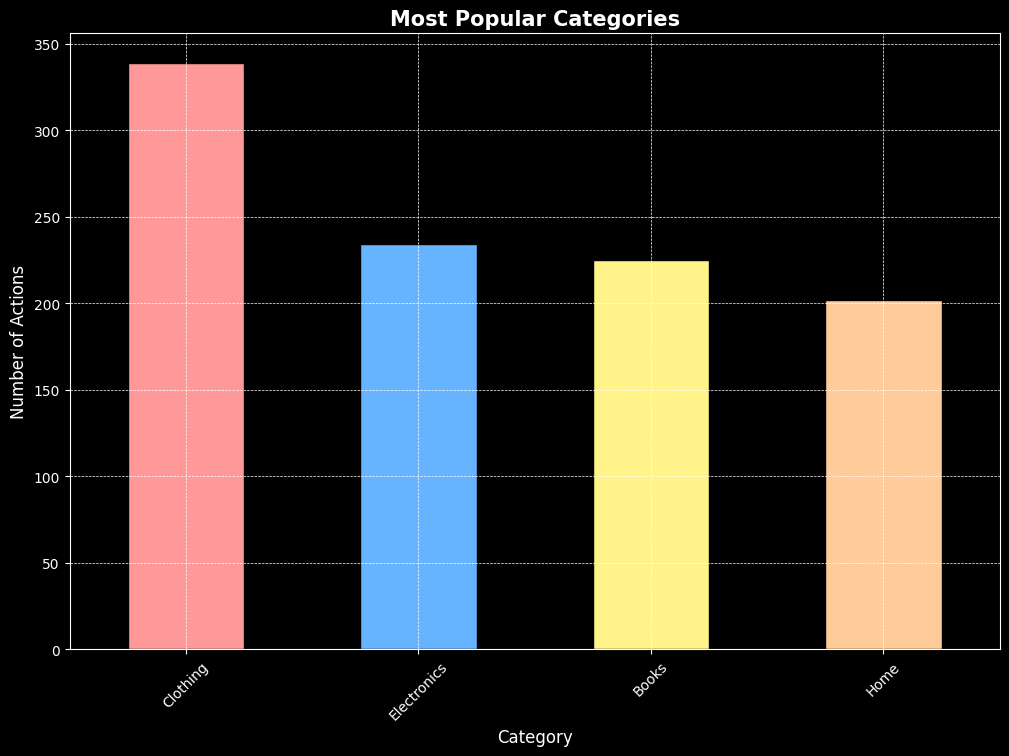

In [23]:
# grouping the data by Category, and counting the number of actions for each category 
# (as they determine the number of times a product was viewed, added to cart, or purchased)
category_counts = df['Category'].value_counts()

# plotting the most popular categories
plt.figure(figsize=(12, 8))
plt.title('Most Popular Categories', fontsize=15, fontdict={'fontweight': 'bold'})

colors = ['#ff9999', '#66b3ff','#fff38a', '#ffcc99']
category_counts.plot(kind='bar', color=colors, edgecolor='black')

plt.xlabel('Category', fontsize=12)
plt.xticks(rotation=45, fontsize=10)

plt.ylabel('Number of Actions', fontsize=12)
plt.yticks(fontsize=10)

plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.savefig('./generated/A1e.png', dpi=500)
plt.show()

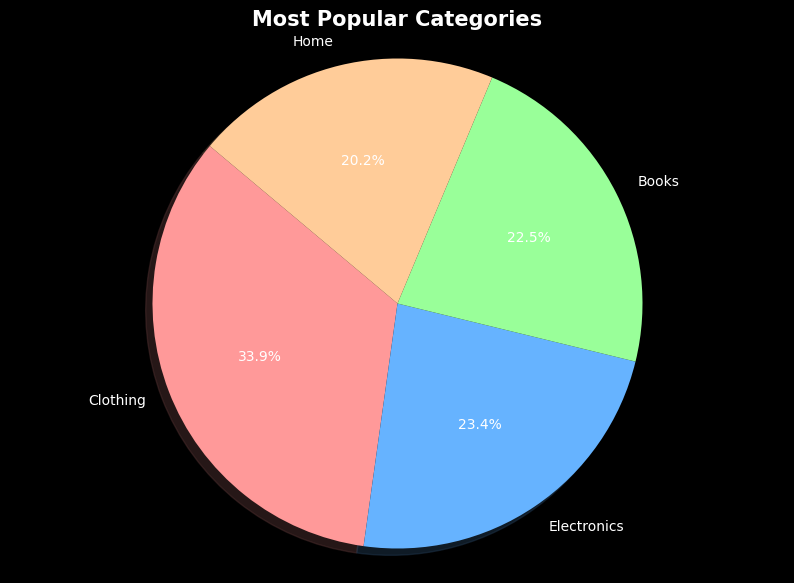

In [24]:
plt.figure(figsize=(10, 7))
plt.title('Most Popular Categories', fontsize=15, fontweight='bold')

colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']
category_counts.plot(kind='pie', autopct='%1.1f%%', colors=colors, startangle=140, shadow=True)

plt.ylabel('')
plt.axis('equal')

plt.savefig('./generated/A1f.png', dpi=500)
plt.show()

### *Analysis: While it is evident that most popular category is **Clothing**, it is actually **quite close** among all categories, and we must keep in mind that **100 of those values** were filled in by us.*

#### **3: Calculating the average price of products in each category:**

In [25]:
average_price_per_category = df.groupby('Category')['Price'].mean()
average_price_per_category

Category
Books          263.292355
Clothing       249.830230
Electronics    261.835832
Home           259.914688
Name: Price, dtype: float64

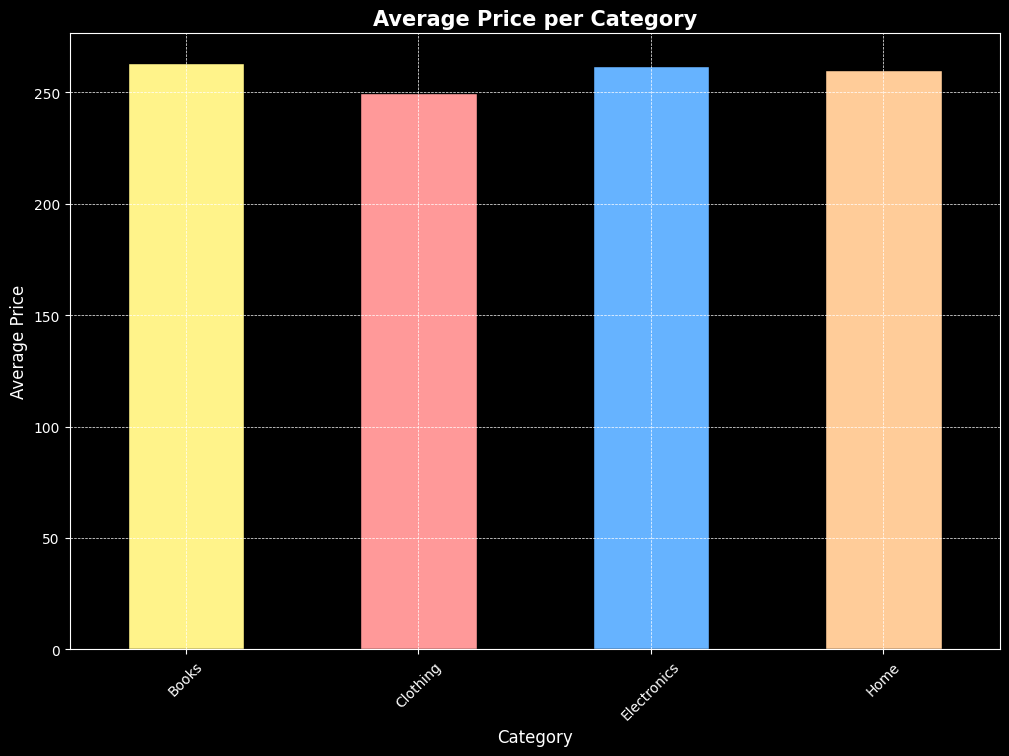

In [26]:
plt.figure(figsize=(12, 8))
plt.title('Average Price per Category', fontsize=15, fontdict={'fontweight': 'bold'})

colors = ['#fff38a', '#ff9999','#66b3ff', '#ffcc99']
average_price_per_category.plot(kind='bar', color=colors, edgecolor='black')

plt.xlabel('Category', fontsize=12)
plt.xticks(rotation=45, fontsize=10)

plt.ylabel('Average Price', fontsize=12)
plt.yticks(fontsize=10)

plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.savefig('./generated/A1g.png', dpi=500)
plt.show()

### *Analysis: The average price of products, per category, is actually **quite close**, nearing **around 250**, with **Books** and **Electronics** having the **highest average price**.*

### **Part 3: Machine Learning Preprocessing:**

#### **1: Encoding categorical variables:**

In [27]:
''' 

 df_encoded = pd.get_dummies(df, columns=["Category", "Action"]) 
 
 We could encode categorical values as shown above, but from my own research, this creates redundancy.
 For example, the categorical feature Category, after one-hot encoding, would become:
 Category_books, Category_clothing, Category_electronics, and Category_home. Now, we will know that if:
 Category_books, Category_clothing, Category_electronics are all 0, Category_home MUST be 1.
 Because of this, as we can directly infer one feature from other features, this perfect collinearity can confuse many models.
 Thus, we drop one of the features when doing one-hot encoding.
 
'''

df_encoded = pd.get_dummies(df, columns=["Category", "Action"], drop_first=True)
df_encoded.head(10)
# internally, True/False is equivalent to 1/0 in calculations.
# thus, as most ML models automatically treat True/False as 1/0, no conversion is necessary to 0s and 1s explicitly.

,CustomerID,Timestamp,ProductID,Price,Quantity,TotalSpent,Category_Clothing,Category_Electronics,Category_Home,Action_Purchase,Action_View
0,1001,2024-05-06,18,270.806190,5,1354.030951,False,False,False,False,False
1,1001,2023-10-02,4,32.600547,2,65.201093,True,False,False,False,False
2,1001,2024-12-06,11,101.151270,2,202.302540,True,False,False,False,True
3,1001,2025-04-07,16,284.828487,1,284.828487,True,False,False,True,False
4,1001,2025-08-11,20,257.705579,2,515.411159,True,False,False,True,False
5,1001,2023-07-12,8,64.266738,3,192.800215,True,False,False,True,False
6,1001,2025-07-19,12,154.890390,2,309.780781,False,False,False,True,False
7,1001,2023-04-23,8,64.848604,4,259.394417,False,False,False,False,True
8,1001,2023-10-18,8,420.694570,1,420.694570,True,False,False,False,False
9,1001,2025-01-08,15,25.396693,2,50.793385,False,True,False,True,False


In [28]:
# however, we will do it for consistency.

df_encoded['Category_Clothing'] = df_encoded['Category_Clothing'].astype(int)
df_encoded['Category_Electronics'] = df_encoded['Category_Electronics'].astype(int)
df_encoded['Category_Home'] = df_encoded['Category_Home'].astype(int)

df_encoded['Action_Purchase'] = df_encoded['Action_Purchase'].astype(int)
df_encoded['Action_View'] = df_encoded['Action_View'].astype(int)

df_encoded.head(10)

,CustomerID,Timestamp,ProductID,Price,Quantity,TotalSpent,Category_Clothing,Category_Electronics,Category_Home,Action_Purchase,Action_View
0,1001,2024-05-06,18,270.806190,5,1354.030951,0,0,0,0,0
1,1001,2023-10-02,4,32.600547,2,65.201093,1,0,0,0,0
2,1001,2024-12-06,11,101.151270,2,202.302540,1,0,0,0,1
3,1001,2025-04-07,16,284.828487,1,284.828487,1,0,0,1,0
4,1001,2025-08-11,20,257.705579,2,515.411159,1,0,0,1,0
5,1001,2023-07-12,8,64.266738,3,192.800215,1,0,0,1,0
6,1001,2025-07-19,12,154.890390,2,309.780781,0,0,0,1,0
7,1001,2023-04-23,8,64.848604,4,259.394417,0,0,0,0,1
8,1001,2023-10-18,8,420.694570,1,420.694570,1,0,0,0,0
9,1001,2025-01-08,15,25.396693,2,50.793385,0,1,0,1,0


#### **2: Standardizing Numerical Features (using Z-score normalization):**

In [29]:
#importing the required scaler 
# (Z-score normalization is also called standardization, available as a class in the SciKit Learn Library)
from sklearn.preprocessing import StandardScaler

# selecting the numerical features to be standardized
numerical_features = ['Price', 'Quantity', 'TotalSpent']

# initializing and using
scaler = StandardScaler()
df_encoded[numerical_features] = scaler.fit_transform(df_encoded[numerical_features])

df_encoded.head(10)

,CustomerID,Timestamp,ProductID,Price,Quantity,TotalSpent,Category_Clothing,Category_Electronics,Category_Home,Action_Purchase,Action_View
0,1001,2024-05-06,18,0.095747,1.432473,0.969881,0,0,0,0,0
1,1001,2023-10-02,4,-1.645208,-0.689709,-1.200188,1,0,0,0,0
2,1001,2024-12-06,11,-1.144197,-0.689709,-0.969344,1,0,0,0,1
3,1001,2025-04-07,16,0.198231,-1.397104,-0.830390,1,0,0,1,0
4,1001,2025-08-11,20,0.000000,-0.689709,-0.442146,1,0,0,1,0
5,1001,2023-07-12,8,-1.413772,0.017685,-0.985343,1,0,0,1,0
6,1001,2025-07-19,12,-0.751438,-0.689709,-0.788377,0,0,0,1,0
7,1001,2023-04-23,8,-1.409519,0.725079,-0.873215,0,0,0,0,1
8,1001,2023-10-18,8,1.191225,-1.397104,-0.601626,1,0,0,0,0
9,1001,2025-01-08,15,-1.697858,-0.689709,-1.224447,0,1,0,1,0


#### **3: Finally, splitting the dataset into training and testing sets (80-20):**

In [30]:
# importing the required class
from sklearn.model_selection import train_test_split

# defining the features (X_1, X_2, ...) and the target (Y)
X = df_encoded.drop(columns=['TotalSpent']) # takes all the columns, except 'TotalSpent'
y = df_encoded['TotalSpent'] # takes only the 'TotalSpent' column

# spliting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=69)
# the random_state part is quite important, as it ensure the same random split happens every time.
# from my research, this reproducibility of the same split ensures that ML models keep working well.
# we can use any random integer here.
# I specifically refrained from using '42' on purpose (I do know the reference :D)

# display the shapes of the resulting datasets (to verify working)
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (800, 10)
X_test shape: (200, 10)
y_train shape: (800,)
y_test shape: (200,)


### **Part 4: Insights and Data Prep Summary:**

#### **1. Summary of Data Analysis, Feature Engineering, and Preprocessing Steps:**

The dataset consists of **1,000 customer interactions** with e-commerce products. Our columns are **CustomerID, ProductID, Category, Price, Quantity, and Action**.  Now, **Category** had **100 missing values**, which were filled using the **mode** (most frequent category). **Price** also had **100 missing values**, which were imputed using the **mean price** of all products.

As for **Feature Engineering**, we created **"TotalSpent"** as a new feature:

*TotalSpent = Price * Quantity*

**Customer interaction:**  While most customers had **an average of ~10 interactions**, some had significantly **higher engagement**, indicating potential high-value customers.

**Category:** The **Clothing category** was the most frequently interacted with; however, other categories had a fairly **even distribution of popularity**.

**Price:** The **average price of products** across categories was fairly similar (~$250), but Books and Electronics had **slightly higher average prices**.

**Preprocessing Steps:**

**Categorical Encoding:** We used **One-Hot Encoding (OHE)** for categorical variables (**Category** and **Action**), and we also dropped the first category (**drop_first=True**) to prevent **redundant features and confusion in our models.**
Then, we explicitly converted boolean values (**True/False**) to **1/0** for consistency.

**Standardization (Z-score Normalization):** We applied the **StandardScaler** to normalize all the numerical feature (i.e, **Price**, **Quantity**, and **TotalSpent**). This ensured all numerical features **followwed a normal distribution (mean = 0, std = 1)**.

**Train-Test Split (80-20):** **80%** training data (X_train, y_train), and **20%** testing data (X_test, y_test). Also, we used **random_state=69** (instead of 42) to ensure **consistent dataset splitting across multiple runs**.

---

#### **2. Trends and Patterns Observed in the Data:**

**Engagement Patterns:** A **normal distribution of customer interactions** was observed, where most customers had around **10 interactions**, but a few had **significantly higher engagement**. These **high-engagement customers** could be potential targets for **personalized marketing or loyalty programs**.

**Expenditure Behavior:** Most customers spent between **$5,000-$10,000**, but a few **high-value customers** spent **above $13,000**, indicating **outlier behavior**. This could suggest **VIP customers**, which may be useful for **customer segmentation**.

**Category Insights:** **Clothing** had the highest number of interactions, but other categories were **evenly distributed**. Since **100 missing values** in **Category** were filled using the **mode**, there might be **a slight bias** toward **Clothing**.
Also, **Average product prices** were similar across categories, but **Books** and **Electronics** were slightly more expensive.

---

#### **3. Rationale Behind Feature Engineering & Preprocessing Choices:**

**Handling Missing Values:** We used **mode** for **Category**, since **Category** is **categorical**, *(using the most frequent value ensured **logical consistency**)*. Then, we used**mean** for **Price:** since **Price** is **numerical**, *(mean imputation prevented unnecessary loss of data)*.

**Feature Engineering:** **TotalSpent** was added because it directly **correlates with revenue and customer spending behavior**.

**Preprocessing Decisions:** 
**One-Hot Encoding** was used for categorical features, because ML models require numerical inputs, and One-Hot Encoding prevents **ordinal misinterpretation** (e.g., treating "Books > Electronics").Also, we **dropped one category *(using drop_first=True)*** to prevent multicollinearity.

**Z-score Normalization (Standardization)** was used because it ensured that all numerical features **have the same scale**, and prevented features with large values (like **Price**) from **dominating the model**.

**Train-Test Split** of (80-20) ensured the model generalizes well to unseen data. We used **random_state** for **consistent reproducibility**.

---

#### This dataset is now **ready for machine learning models**.
##### **It has no missing values** after imputation.
##### **It has properly scaled numerical features** to prevent model bias.
##### **It also has well-encoded categorical variables** (using One-Hot Encoding).
##### **It also has a balanced train-test split** to ensure **good model performance evaluation**.
---